<center><h1 style="color:#173F8A;"> Algebra Lineal Numerica, IMT2111, 2024-1 </h1></center>
<h3 style="color:#173F8A;text-align:right;"> Instituto de Ingenieria Matematica y Computacional<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br> </h3>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="250" height="400"><br><br><br><br><br>
</figure>
 -->

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

In [2]:
global QR_TOL
QR_TOL = 10**(-12)

In [3]:
def iteracion_potencia(A, x0 = None, MAXITER=1000, tol=1e-9):
    if x0 is None:
        x_k = np.random.rand(A.shape[1])
    else:
        x_k = x0.copy()
    lambda_k = np.dot(x_k, np.dot(A, x_k)) / x_k.dot(x_k)

    k = 0
    while k<MAXITER and np.linalg.norm(A.dot(x_k)-lambda_k*x_k)>tol:
        x_k1 = np.dot(A, x_k)
        x_k1_norm = np.linalg.norm(x_k1)
        x_k = x_k1 / x_k1_norm
        
        lambda_k = np.dot(x_k, np.dot(A, x_k)) 
        k +=1
    return lambda_k, x_k

In [4]:
A = np.array([[4, 1], [2, 3]])
# A = np.array([[4, 0,0], [0, -1,0],[0,0,-5]])
eigenvalue, eigenvector = iteracion_potencia(A)
print("Valor propio dominante:", eigenvalue)
print("Vector propio correspondiente:", eigenvector)

Valor propio dominante: 4.99999999967897
Vector propio correspondiente: [0.70710678 0.70710678]


In [5]:
from scipy.linalg import lu_factor, lu_solve
def iteracion_inversa(A, sigma,x0 = None, MAXITER=10000, tol=1e-9):
    n = A.shape[0]
    
    if x0 is None:
        x_k = np.random.rand(A.shape[1])
    else:
        x_k = x0.copy()
    lambda_k = np.dot(x_k, np.dot(A, x_k)) / x_k.dot(x_k)

    k = 0
    LU, piv = lu_factor(A - sigma * np.eye(n))
    while k<MAXITER and np.linalg.norm(A.dot(x_k)-lambda_k*x_k)>tol:
        # Resolvemos el sistema lineal usando la factorización LU
        
        x_k1 = lu_solve((LU, piv), x_k)
        x_k1_norm = np.linalg.norm(x_k1)
        x_k = x_k1 / x_k1_norm
        
        lambda_k = np.dot(x_k, np.dot(A, x_k)) 
        k +=1
    return lambda_k, x_k

In [6]:
A = np.array([[4, 1], [2, 3]])
# A = np.array([[4, 0,0], [0, -1,0],[0,0,5]])
sigma = 4.0
eigenvalue, eigenvector = iteracion_inversa(A, sigma)
print("Valor propio más cercano a", sigma, ":", eigenvalue)
print("Vector propio correspondiente:", eigenvector)

Valor propio más cercano a 4.0 : 4.99999999981306
Vector propio correspondiente: [0.70710678 0.70710678]


In [7]:
def iteracion_ortogonal(A, p, Z0=None, MAXITER=20, tol=1e-9):
    n = A.shape[0]
    if Z0 is None:
#         Z_k, _ = np.linalg.qr(np.random.rand(n, p))
        Z_k = np.eye(n)[:,:p]
    else:
        Z_k = Z0.copy()
    
    k=0
    while k<MAXITER:
        Y_k1 = A@Z_k
        
        # Factorizacion QR
        Z_k, R_k = np.linalg.qr(Y_k1)
        k+=1
    
    # Los valores propios se encuentran en la diagonal de R
    eigenvalues = np.diag(R_k)
    
    return eigenvalues, R_k

In [8]:

# Ejemplo de uso
# A = np.array([[4, 1], [2, 3]])
A = np.array([[4, 0,0], [0, -1,0],[0,0,5]])
# A = np.array([[3.5488, 15.593, 8.5775, -4.0123],
#               [2.3595, 24.526, 14.596, -5.8157],
#               [8.9953e-2, 27.599, 21.483, -5.8415],
#               [1.9227, 55.667, 39.717, -10.558]])
eigenvalues, eigenvectors = iteracion_ortogonal(A, p=3, MAXITER=1000)
print("Valores propios:", eigenvalues)
print("R_k:")
print(eigenvectors)

Valores propios: [ 4. -1.  5.]
R_k:
[[ 4.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  5.]]


In [9]:
def Iteracion_QR(A):
    T = A.copy()
    k = T.shape[0]
    lambdas = np.zeros(k)
    k -= 1
    
    while k > 0:
        Q, R = np.linalg.qr(T)
        T = R@Q
        delta = np.abs(T[k,k-1])
        if delta < QR_TOL:
            lambdas[k] = T[k,k]
            T = T[:k,:k]
            k -= 1
    lambdas[0] = T
    return np.array(lambdas), delta

In [10]:

# Ejemplo de uso
# A = np.array([[4, 1], [2, 3]])
# A = np.array([[4, 0,0], [0, -1,0],[0,0,5]])
A = np.array([[3.5488, 15.593, 8.5775, -4.0123],
              [2.3595, 24.526, 14.596, -5.8157],
              [8.9953e-2, 27.599, 21.483, -5.8415],
              [1.9227, 55.667, 39.717, -10.558]])
eigenvalues, eigenvectors =Iteracion_QR(A)
print("Valores propios:", eigenvalues)
print("R_k:")
print(eigenvectors)

Valores propios: [29.999601    6.0002065   1.99977623  1.00021626]
R_k:
2.2732529145506414e-30


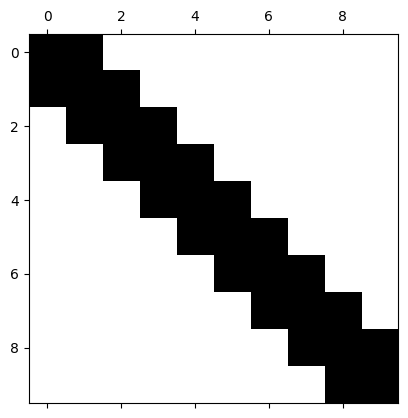

In [11]:
A = 2*np.eye(10) - np.diag(np.ones(9),-1) -np.diag(np.ones(9),1)
plt.spy(A)
plt.show()

In [12]:
lambdas, delta = Iteracion_QR(A)
print(lambdas)
print(np.sort(np.linalg.eigh(A)[0])[::-1])

[3.91898595 3.68250707 3.30972147 2.83083003 2.28462968 1.71537032
 1.16916997 0.69027853 0.31749293 0.08101405]
[3.91898595 3.68250707 3.30972147 2.83083003 2.28462968 1.71537032
 1.16916997 0.69027853 0.31749293 0.08101405]


In [33]:
def my_sign(x):
    if x>=0:
        return 1.0
    else:
        return -1.0
def Iteracion_QR_shift(A, shift='Rayleigh'):
    T = A.copy()
    k = T.shape[0]
    lambdas = np.zeros(k)
    eigenvector = []
    k -= 1
    while k > 0:
        if shift == 'Rayleigh':
            mu = T[k,k];
            muI = mu*np.eye(k+1)
        elif shift =='Wilkinson':
            d = (T[k-1,k-1]-T[k,k])/2 
            mu = T[k,k] - my_sign(d)*T[k,k-1]**2/(np.abs(d)+np.sqrt(d**2+T[k,k-1]**2));
            muI = mu*np.eye(k+1)
        else: 
            mu = 0; muI = np.zeros(k+1)
        Q, R = np.linalg.qr(T-muI)
        T = R@Q + muI
        delta = np.abs(T[k,k-1])
        if delta < QR_TOL:
            lambdas[k] = T[k,k]
            T = T[:k,:k]
            k -= 1
    lambdas[0] = T
    return np.array(lambdas)#, delta

In [34]:
lambdas, delta = Iteracion_QR_shift(A, shift='Wilkinson')
# lambdas, delta = Iteracion_QR_shift(A, shift='Rayleigh')
print(lambdas)

ValueError: too many values to unpack (expected 2)

In [35]:
from scipy.linalg import eig, eigh
l,v = eig(A)
print(l)

[29.999601  +0.j  6.0002065 +0.j  1.00021626+0.j  1.99977623+0.j]


In [36]:
from math import sqrt
def make_house_vec(x):
    n = x.shape[0]
    dot_1on = x[1:].dot(x[1:])

    # v is our return vector; we hack on v[0]
    v = np.copy(x)
    v[0] = 1.0
    
    if dot_1on < np.finfo(float).eps:
        beta = 0.0
    else:
        # apply Parlett's formula (G&vL page 210) for safe v_0 = x_0 - norm(X) 
        norm_x= sqrt(x[0]**2 + dot_1on)
        if x[0] <= 0:
            v[0] = x[0] - norm_x
        else:
            v[0] = -dot_1on / (x[0] + norm_x)
        beta = 2 * v[0]**2 / (dot_1on + v[0]**2)
        v = v / v[0]
    return v, beta

In [37]:
def Hessenberg(Adata):
    A = Adata.copy()
    m,n = A.shape # m ==n
    betas = np.empty(n)
    for j in range(n-2):
        v, betas[j] = make_house_vec(A[(j+1):, j])
        A[(j+1):,j:] = (np.eye(m-(j+1)) - betas[j] * np.outer(v,v))@(A[(j+1):,j:])
        A[:,(j+1):] = A[:,(j+1):]@(np.eye(m-(j+1)) - betas[j] * np.outer(v,v))
    return A
 

In [38]:
A = np.array([[3.5488, 15.593, 8.5775, -4.0123],
              [2.3595, 24.526, 14.596, -5.8157],
              [8.9953e-2, 27.599, 21.483, -5.8415],
              [1.9227, 55.667, 39.717, -10.558]])

H = Hessenberg(A)
print(H)

[[ 3.54880000e+00  9.80252021e+00 -4.10363166e+00 -1.48285033e+01]
 [ 3.04501348e+00  3.65241518e+01 -8.35566733e+00 -5.58321924e+01]
 [-9.16621104e-18  2.58345018e+01 -2.56684182e+00 -4.11812184e+01]
 [-1.32906555e-17  1.01616821e-14  5.15015914e-01  1.49368999e+00]]


In [125]:
def Lanczos_eigenvalue_solver(A, M=100):
    TOL=1e-14
    n, n = A.shape
    q0 = np.zeros(n)
    Qlist = []; Qlist.append(q0)
    alpha = []; beta  = []; beta.append(1.0)
    k = 0
    rk = np.random.rand(n)
    
    rk=np.ones(n)#A[:,1]
    rk = rk/np.linalg.norm(rk)
    lambda_history = []
    while beta[k] >TOL and k < M:
        q = rk / beta[k]; Qlist.append(q)
        k += 1
        alphak = q.dot(A.dot(q)); alpha.append(alphak)
        rk = A.dot(q) - alphak*q - beta[k-1]*Qlist[k-1]
        betak = np.linalg.norm(rk); beta.append(betak)

        # Compute eigenvalues
        Tk = np.diag(alpha) + np.diag(beta[1:-1],-1) + np.diag(beta[1:-1],1)
        lambdas = Iteracion_QR_shift(Tk, shift='Rayleigh')
        lambda_history.append(lambdas)
        
    return lambda_history
    

## Example: Trefethen and Bau, page 280

In [126]:
atb = np.zeros(203)
atb[0:201] = np.linspace(0,2.0, 201, endpoint=True)
atb[201] = 2.5
atb[202] = 3.0
ATB = np.diag(atb)

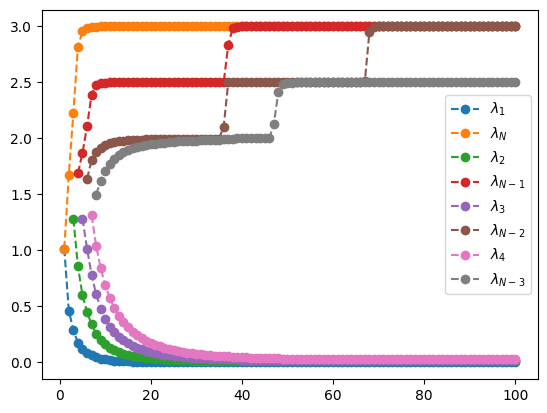

In [151]:
M=100
lambda_history = Lanczos_eigenvalue_solver(ATB, M)

lambdas1 = np.zeros(M)
lambdasN = np.zeros(M)

lambdas2 = np.zeros(M-2)
lambdasN_1 = np.zeros(M-3)

lambdas3 = np.zeros(M-4)
lambdasN_2 = np.zeros(M-5)

lambdas4 = np.zeros(M-6)
lambdasN_3 = np.zeros(M-7)
for i, eigenval in enumerate(lambda_history):
    eigenval = np.sort(eigenval)
    lambdas1[i] = eigenval[0]#np.min(eigenval)
    lambdasN[i] = eigenval[-1] #np.max(eigenval)
    if i>=2:
        lambdas2[i-2] = eigenval[1]
    if i>=3:
        lambdasN_1[i-3] = eigenval[-2]
    if i>=4:
        lambdas3[i-4] = eigenval[2]
    if i>=5:
        lambdasN_2[i-5] = eigenval[-3]
    if i>=6:
        lambdas4[i-6] = eigenval[3]
    if i>=7:
        lambdasN_3[i-7] = eigenval[-4]

plt.plot(np.arange(1,M+1),lambdas1,'o--', label=r'$\lambda_1$')
plt.plot(np.arange(1,M+1),lambdasN,'o--', label=r'$\lambda_N$')
plt.plot(np.arange(3,M+1),lambdas2,'o--', label=r'$\lambda_2$')
plt.plot(np.arange(4,M+1),lambdasN_1,'o--', label=r'$\lambda_{N-1}$')
plt.plot(np.arange(5,M+1),lambdas3,'o--', label=r'$\lambda_3$')
plt.plot(np.arange(6,M+1),lambdasN_2,'o--', label=r'$\lambda_{N-2}$')
plt.plot(np.arange(7,M+1),lambdas4,'o--', label=r'$\lambda_4$')
plt.plot(np.arange(8,M+1),lambdasN_3,'o--', label=r'$\lambda_{N-3}$')

plt.legend()
plt.show()

In [143]:
def Lanczos( A, v, m=100 ):
    n = len(v)
    if m>n: m = n;
    # from here https://en.wikipedia.org/wiki/Lanczos_algorithm
    V = np.zeros( (m,n) )
    T = np.zeros( (m,m) )
    V[0, :] = v

    # step 2.1 - 2.3 in https://en.wikipedia.org/wiki/Lanczos_algorithm
    w = np.dot(A, v[0,:])
    alfa = np.dot(w,v[0,:])
    w = w - alfa*V[:, 0]
    T[0,0] = alfa

    # needs to start the iterations from indices 1
    for j in range(1, m-1 ):
        beta = np.sqrt( np.dot( w, w ) )

        V[j,:] = w/beta

        # This performs some rediagonalization to make sure all the vectors are orthogonal to eachother
        for i in range(j-1):
            V[j, :] = V[j,:] - np.dot(np.conj(V[j,:]), V[i, :])*V[i,:]
        V[j, :] = V[j, :]/np.linalg.norm(V[j, :])


        w = np.dot(A, V[j, :])
        alfa = np.dot(w, V[j, :])
        w = w - alfa * V[j, :] - beta*V[j-1, :]

        T[j,j  ] = alfa
        T[j-1 ,j] = beta
        T[j,j-1] = beta


    return T, V

# ---- generate matrix A
n = 50; m=10
sqrtA = np.random.rand( n,n ) - 0.5
A = np.dot( sqrtA, np.transpose(sqrtA) )

# ---- full solve for eigenvalues for reference
esA, vsA = np.linalg.eig( A )

# ---- approximate solution by Lanczos
v0   = np.random.rand( n ); v0 /= np.sqrt( np.dot( v0, v0 ) )
T, V = Lanczos( A, v0, m=m )
esT, vsT = np.linalg.eig( T )
VV = np.dot( V, np.transpose( V ) ) # check orthogonality

#print "A : "; print A
print( "T : "); print( T)
print( "VV :"); print( VV)
print( "esA :"); print(np.sort(esA))
print( "esT : "); print(np.sort(esT))

plt.plot( esA, np.ones(n)*0.2,  '+' )
plt.plot( esT, np.ones(m)*0.1,  '+' )
plt.ylim(0,1)
plt.show( m )

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed